In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statistics import mean

In [119]:
# raw data
raw = pd.read_csv('owid-energy-data.csv')

In [120]:
energyshare = raw[['country','year','gdp', 'population','electricity_generation','fossil_share_energy', 'coal_production', 'gas_production', 'oil_production']]
energyshare = energyshare.dropna()
y = energyshare[['fossil_share_energy']]
X = energyshare[['year','gdp', 'population','electricity_generation','coal_production', 'gas_production', 'oil_production']]
energyshare

,country,year,gdp,population,electricity_generation,fossil_share_energy,coal_production,gas_production,oil_production
448,Algeria,1985,1.203642e+11,2.243151e+07,12.274,99.316,0.063,373.381,547.320
449,Algeria,1986,1.191450e+11,2.310239e+07,12.981,99.750,0.071,381.894,563.814
450,Algeria,1987,1.183212e+11,2.377429e+07,12.722,99.514,0.063,431.008,583.800
451,Algeria,1988,1.158217e+11,2.444347e+07,13.966,99.834,0.079,450.581,611.450
452,Algeria,1989,1.197624e+11,2.510619e+07,15.324,99.789,0.118,485.832,633.658
...,...,...,...,...,...,...,...,...,...
16832,World,2000,5.986666e+13,6.143777e+09,14978.390,86.065,26799.159,24007.084,41847.895
16842,World,2010,8.980730e+13,6.957137e+09,20887.640,86.571,41899.287,31507.690,46270.760
16848,World,2016,1.071343e+14,7.464344e+09,24196.760,85.472,42591.286,35520.701,50882.192
16849,World,2017,1.104307e+14,7.548182e+09,24877.000,85.157,43666.515,36762.143,51007.482


In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
decTree = DecisionTreeRegressor(max_depth = 6)
cv_results = cross_validate(decTree, X_train, y_train, cv=5)
score = mean(cv_results['test_score'])
print(score)

0.7777849879548332


In [122]:
linreg = LinearRegression()
cv_results = cross_validate(linreg, X_train, y_train, cv=5)
score = mean(cv_results['test_score'])
print(score)

0.06512613610839539


In [123]:
trees = decTree.fit(X_train, y_train)
importances = trees.feature_importances_
importances # according to our decision tree, population and electricity generation are the most important features 

array([5.22402030e-03, 8.70011479e-05, 4.75907026e-01, 1.32520249e-01,
       2.70096974e-01, 8.32769160e-02, 3.28878135e-02])

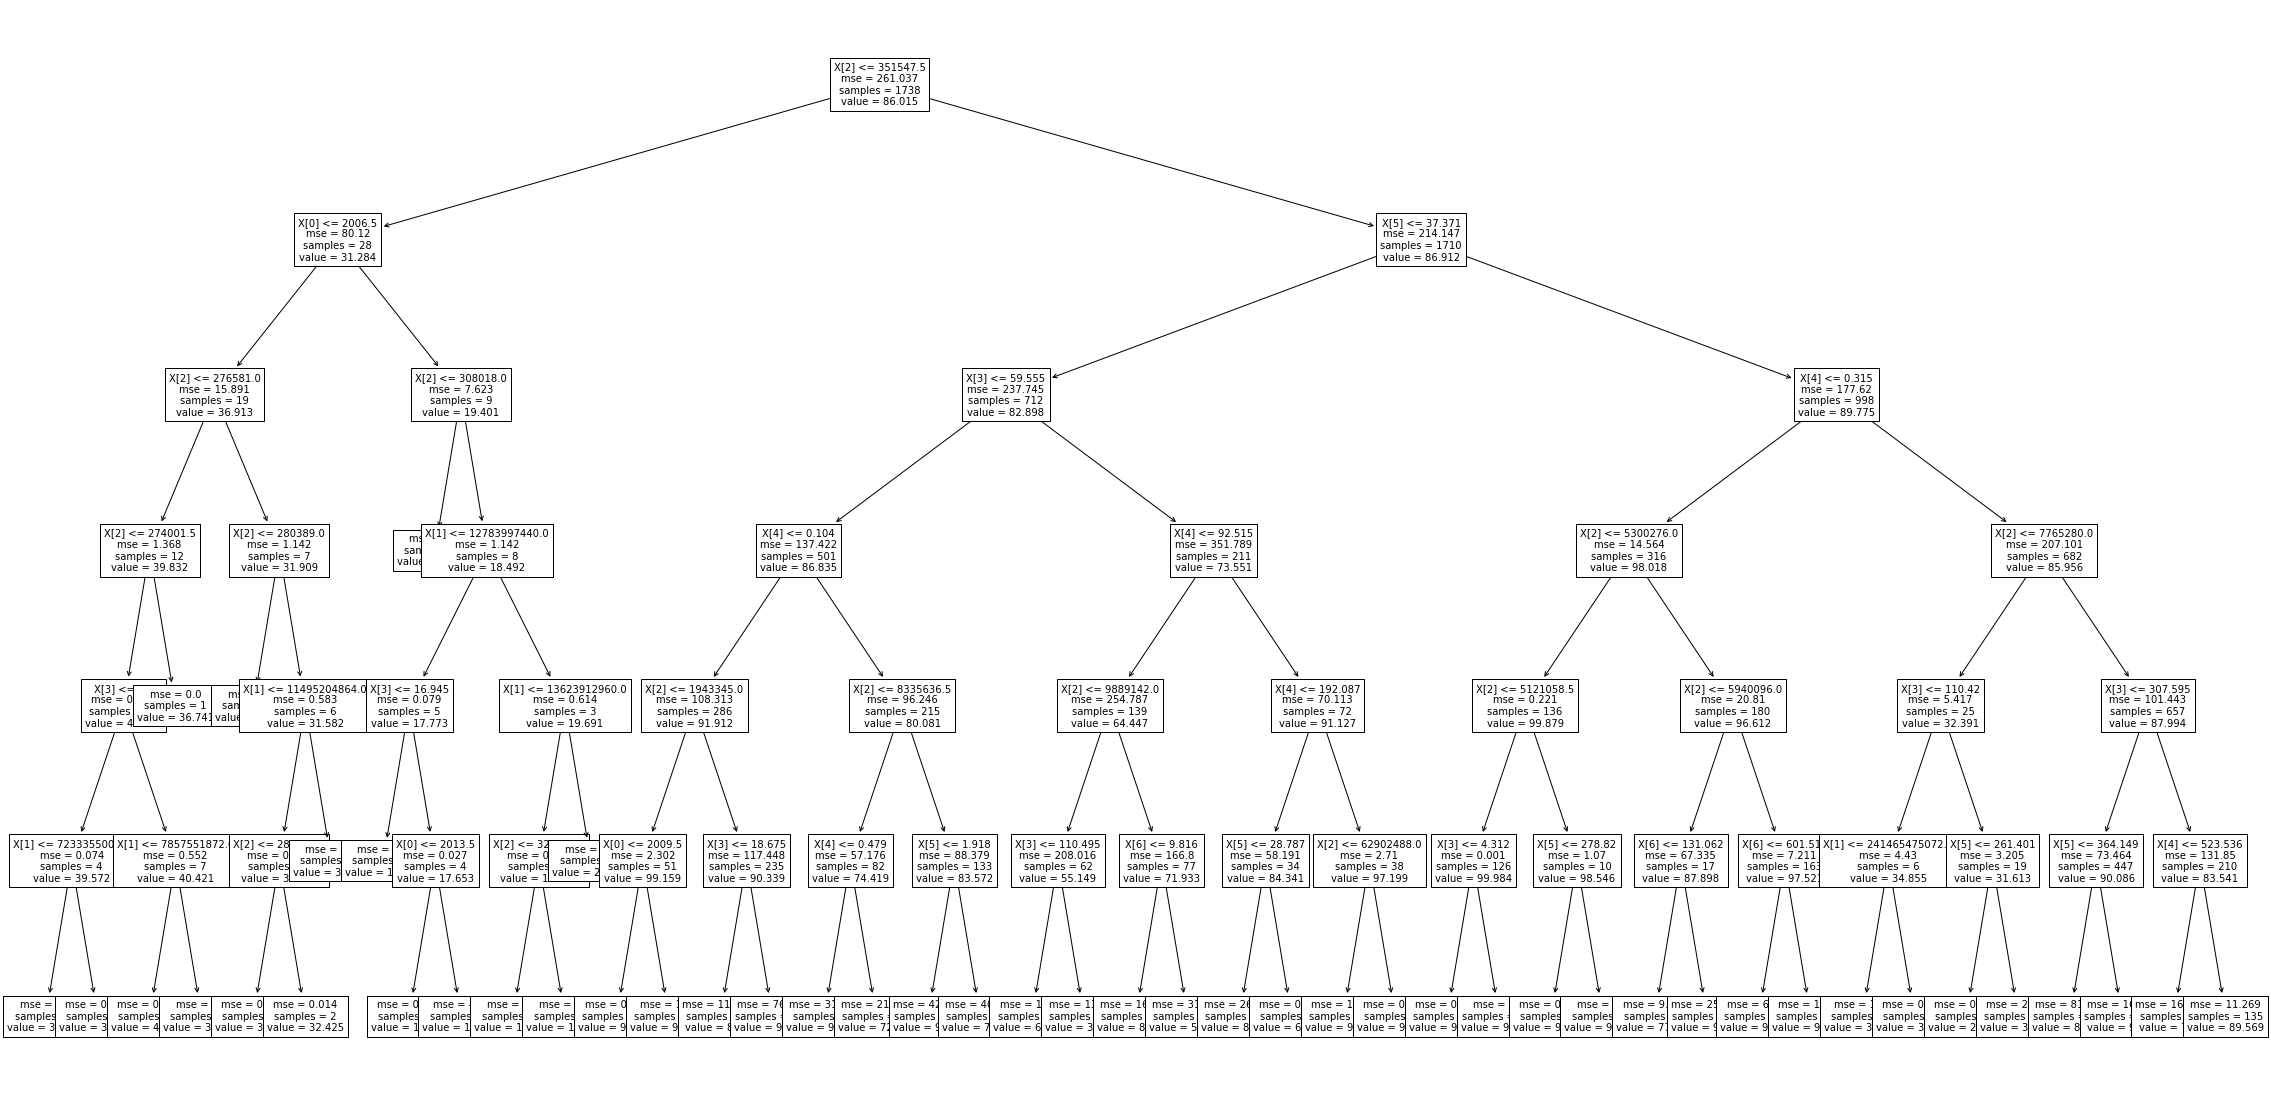

In [135]:
from sklearn.tree import plot_tree
plt.figure(figsize=(40, 20))
plot_tree(trees,fontsize=10)
plt.show()